In [2]:
!mkdir -p ~/.kaggle
!mv /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d anidiptapal/fraud-detection-1000-rows --unzip

mv: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/anidiptapal/fraud-detection-1000-rows
License(s): unknown
 96%|███████████████████████████████████████▌ | 257M/266M [00:02<00:00, 152MB/s]
100%|█████████████████████████████████████████| 266M/266M [00:02<00:00, 123MB/s]


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/working/Fraud.csv')

In [5]:
df.shape

(6362620, 11)

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [11]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [12]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [13]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder ()
df['type'] = le.fit_transform(df['type'])

In [15]:
df.groupby('type')['isFraud'].value_counts()

type  isFraud
0     0          1399284
1     0          2233384
      1             4116
2     0            41432
3     0          2151495
4     0           528812
      1             4097
Name: count, dtype: int64

In [16]:
df['changebalanceOrg']=df['oldbalanceOrg']-df['newbalanceOrig']
df['changebalanceDest']=df['oldbalanceDest']-df['newbalanceDest']

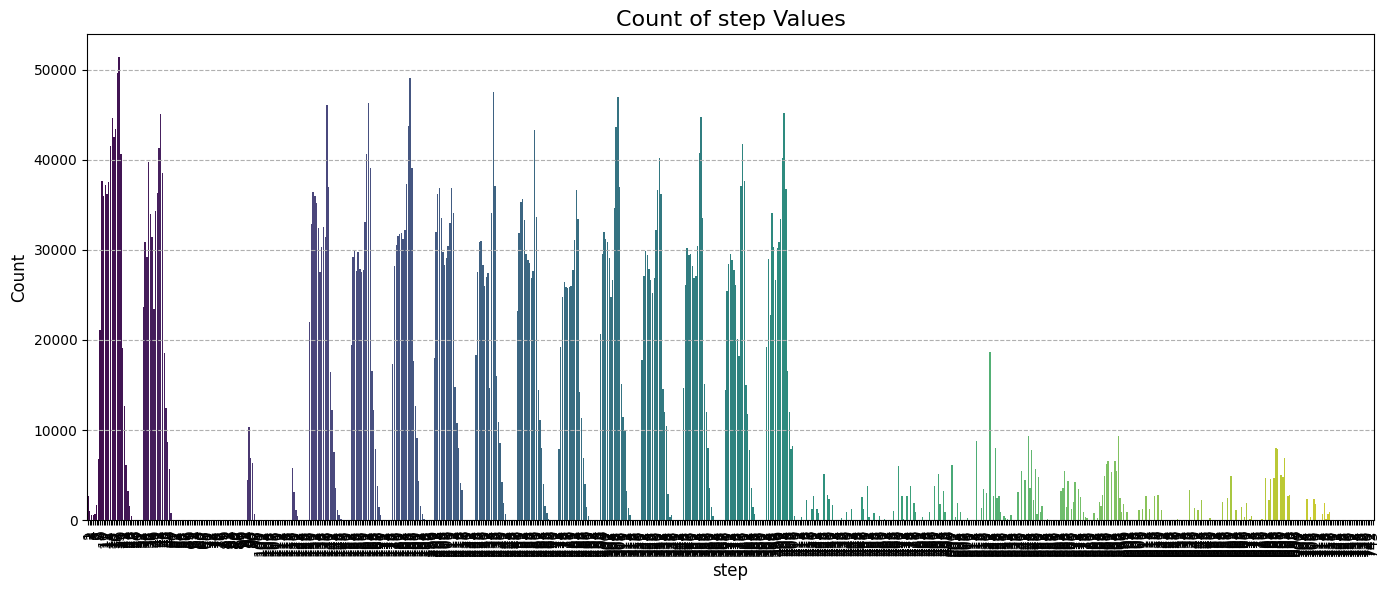

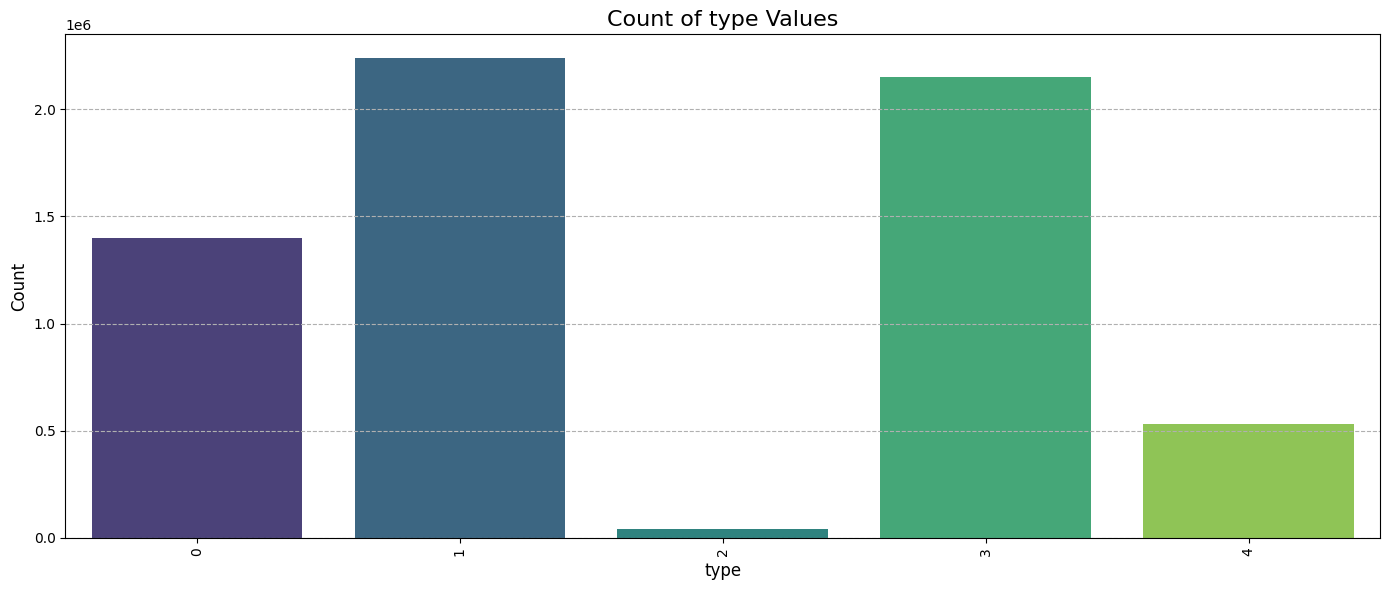

In [17]:
def count_plot(feature):
    plt.figure(figsize=(14, 6))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Count of {feature} Values', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
    print("\n")

columns = ['step', 'type']
for feature in columns:
    count_plot(feature)


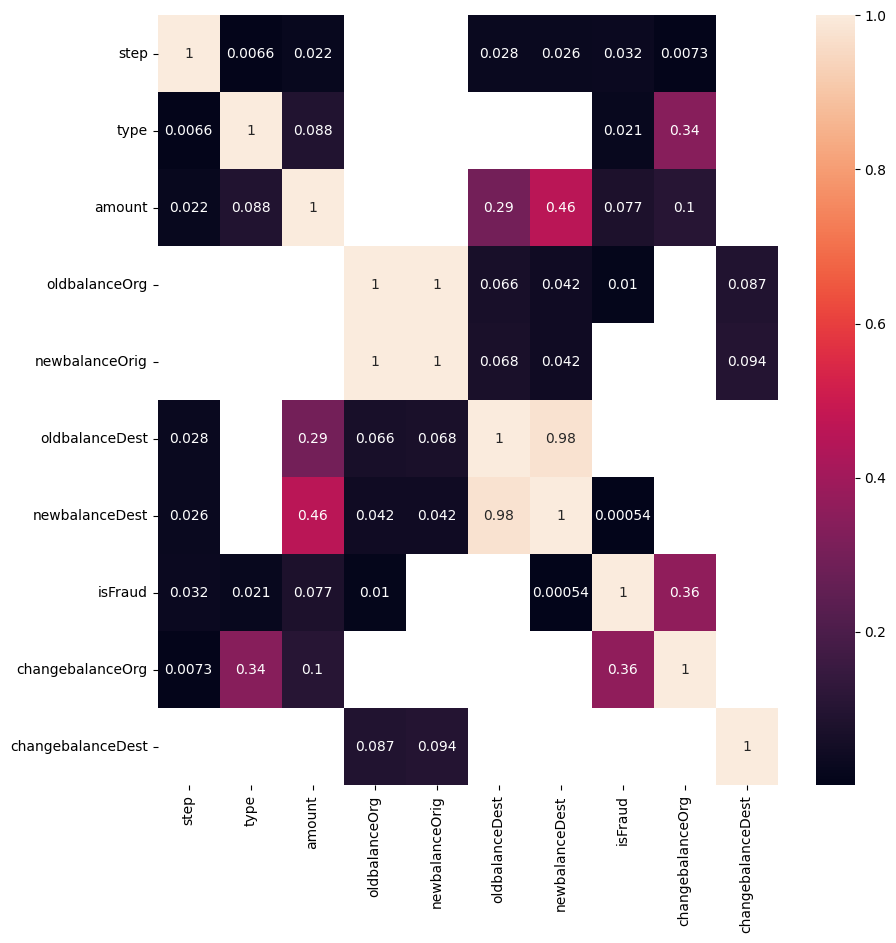

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()[df.corr()>0], annot=True)
plt.show( )

In [19]:
df1= df[['step','type','amount','oldbalanceOrg','newbalanceDest','changebalanceOrg','isFraud']]
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceDest,changebalanceOrg,isFraud
0,1,3,9839.64,170136.0,0.0,9839.64,0
1,1,3,1864.28,21249.0,0.0,1864.28,0
2,1,4,181.00,181.0,0.0,181.00,1
3,1,1,181.00,181.0,0.0,181.00,1
4,1,3,11668.14,41554.0,0.0,11668.14,0


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   type              int64  
 2   amount            float64
 3   oldbalanceOrg     float64
 4   newbalanceDest    float64
 5   changebalanceOrg  float64
 6   isFraud           int64  
dtypes: float64(4), int64(3)
memory usage: 339.8 MB


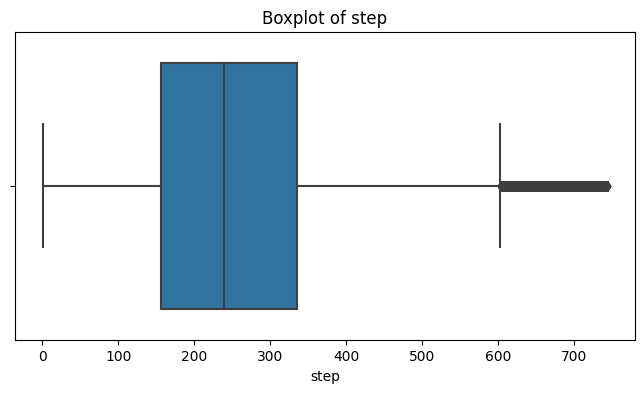

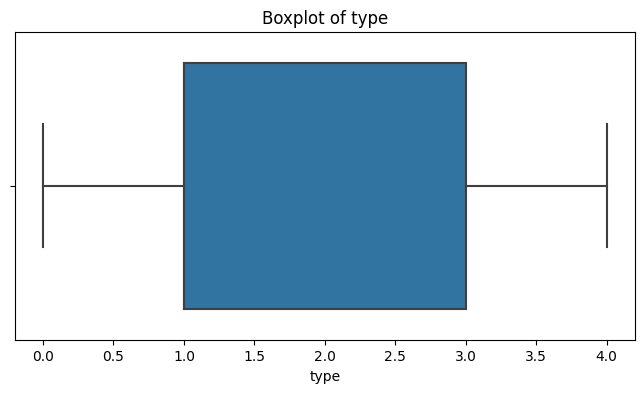

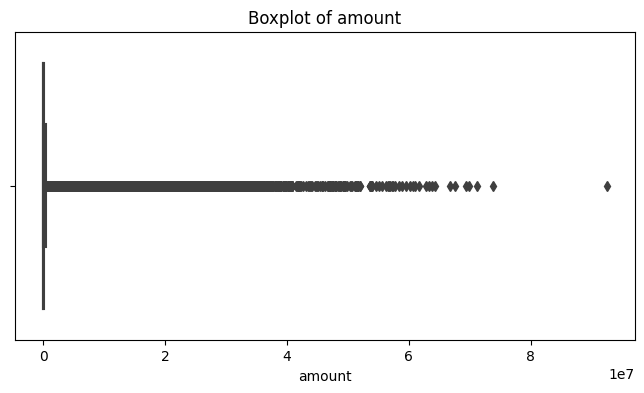

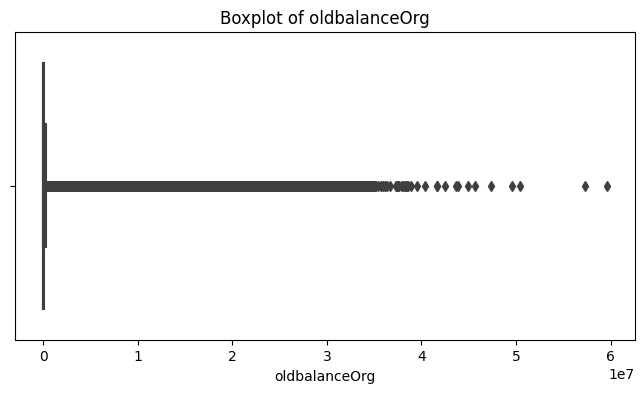

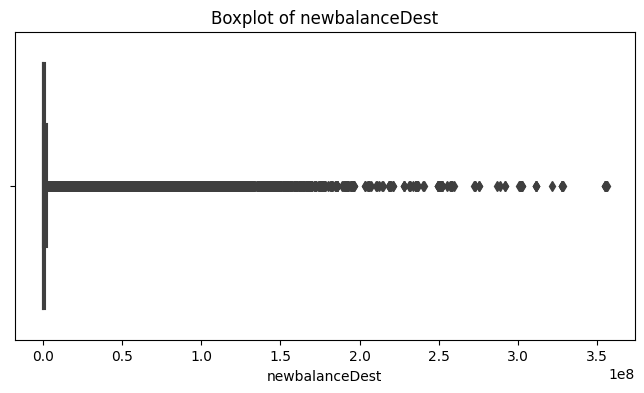

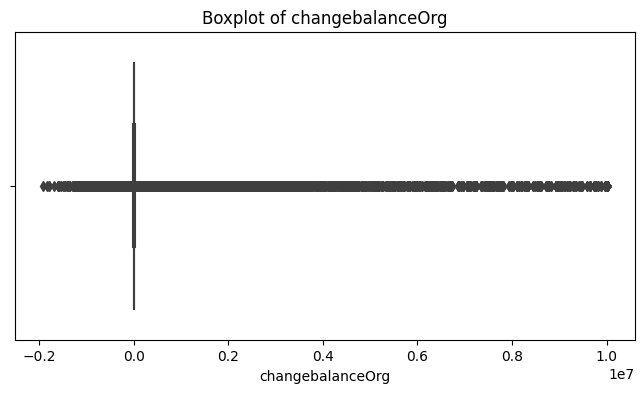

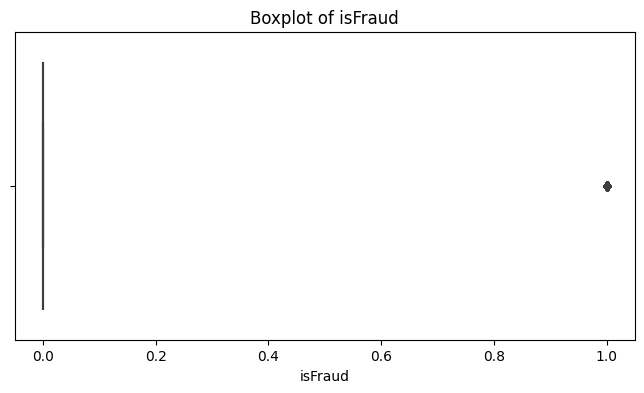

In [21]:
for column in df1.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

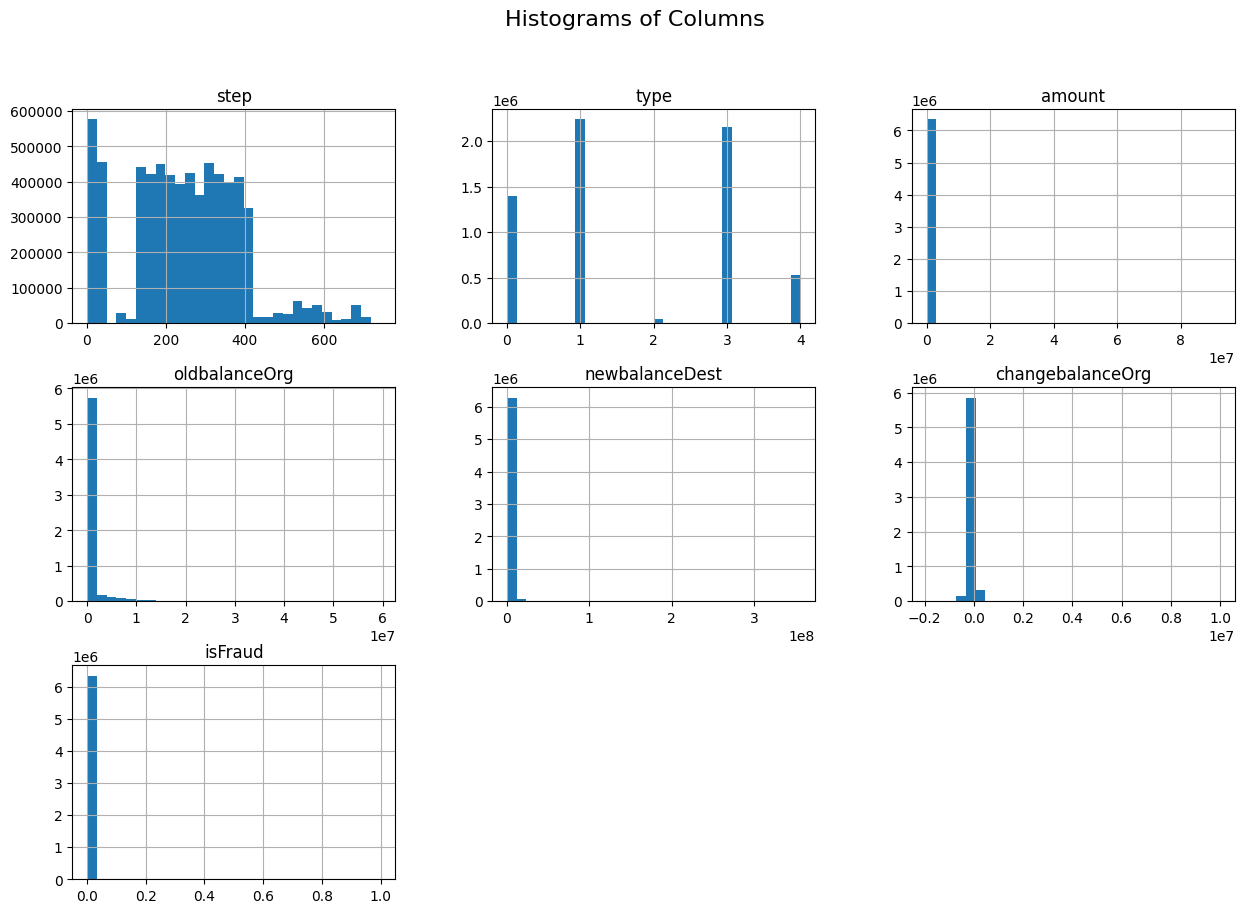

In [22]:
df1.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Columns', fontsize=16)
plt.show()

In [23]:
df1.skew()

step                 0.375177
type                 0.196530
amount              30.993949
oldbalanceOrg        5.249136
newbalanceDest      19.352302
changebalanceOrg    24.630520
isFraud             27.779538
dtype: float64

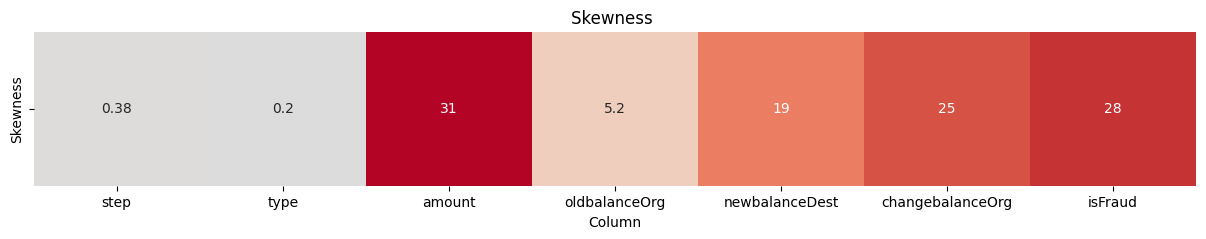

In [24]:
skewness = df1.skew()
skewness_df = skewness.to_frame(name='Skewness').reset_index()
skewness_df.columns = ['Column', 'Skewness']

plt.figure(figsize=(15, 2))
sns.heatmap(skewness_df.set_index('Column').T, annot=True, cmap='coolwarm', cbar=False, center=0)
plt.title('Skewness ')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

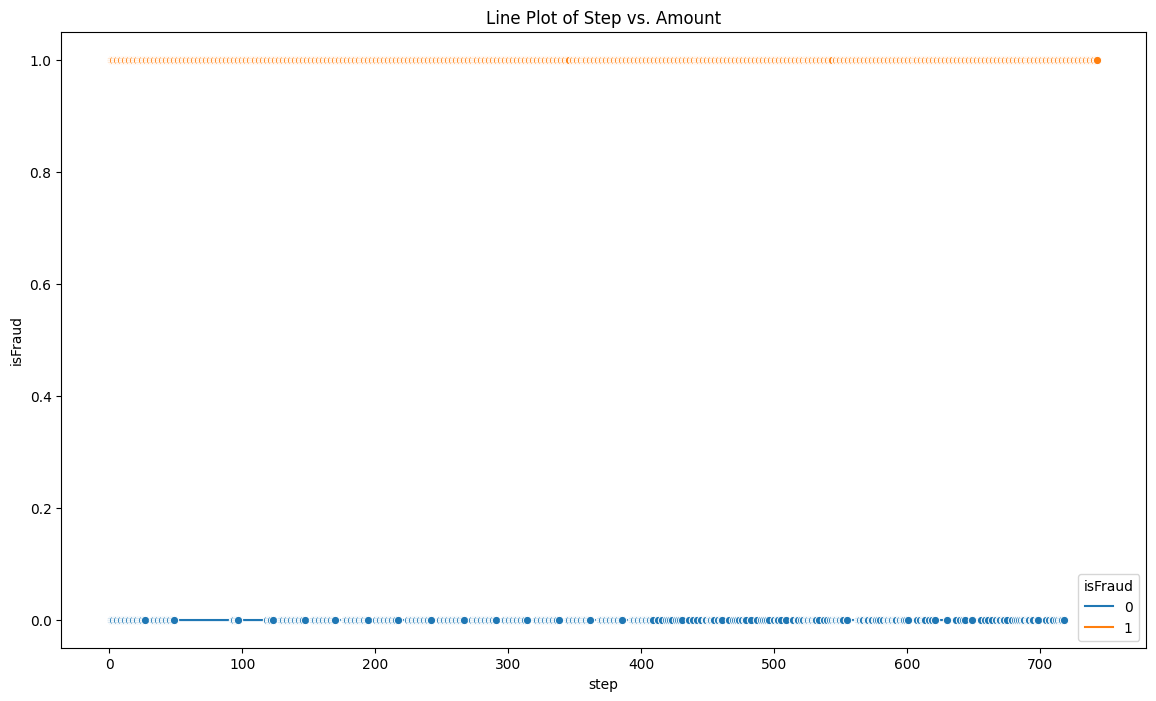

In [25]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='step', y='isFraud', hue='isFraud', marker='o')
plt.title('Line Plot of Step vs. Amount')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

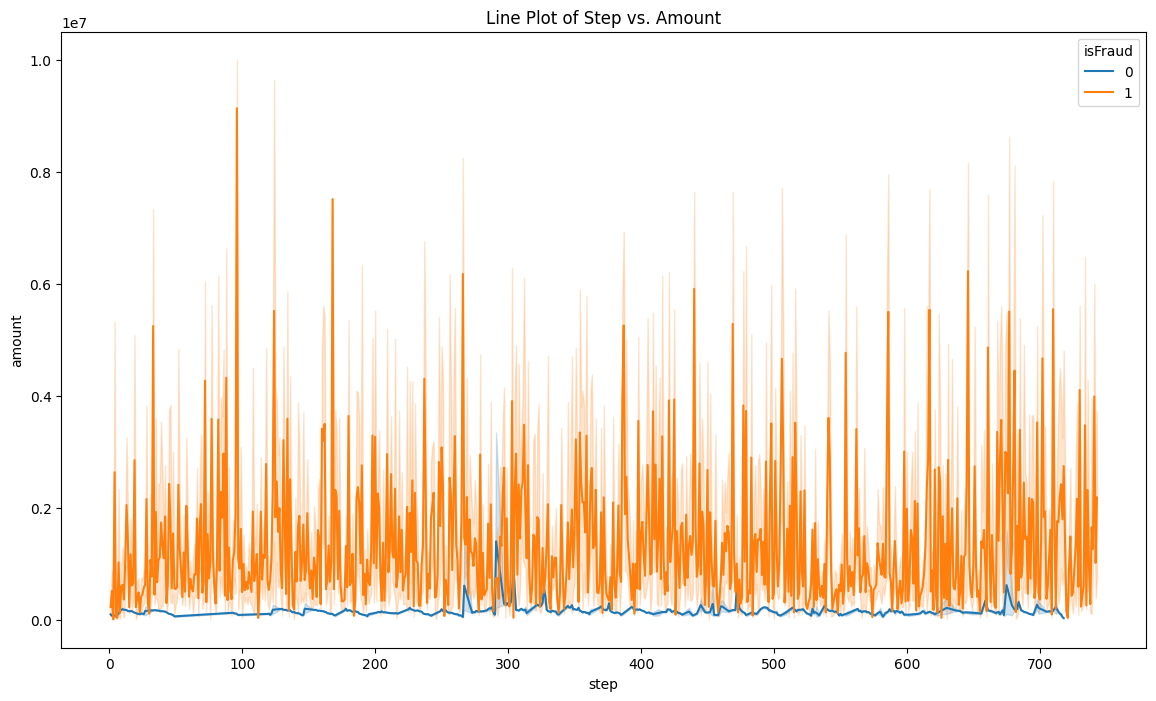

In [26]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='step', y='amount', hue='isFraud')
plt.title('Line Plot of Step vs. Amount')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

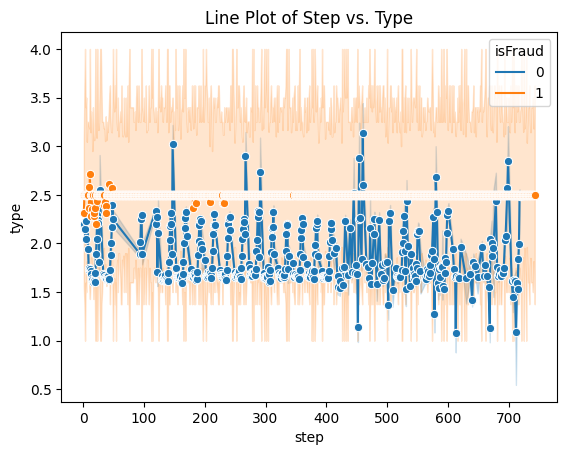

In [27]:
sns.lineplot(data=df1, x='step', y='type', hue='isFraud', marker='o')
plt.title('Line Plot of Step vs. Type')
plt.show()

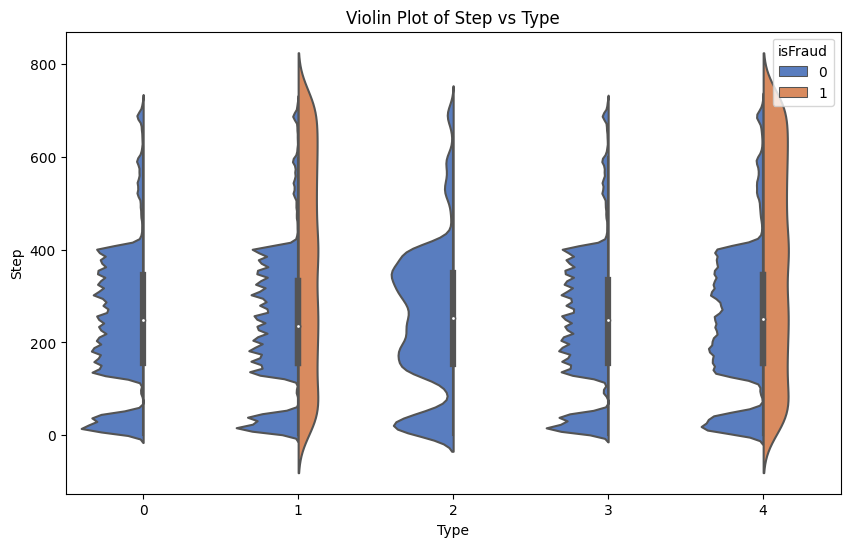

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1, x='type', y='step', hue='isFraud', split=True, palette='muted')
plt.title('Violin Plot of Step vs Type')
plt.xlabel('Type')
plt.ylabel('Step')
plt.show()

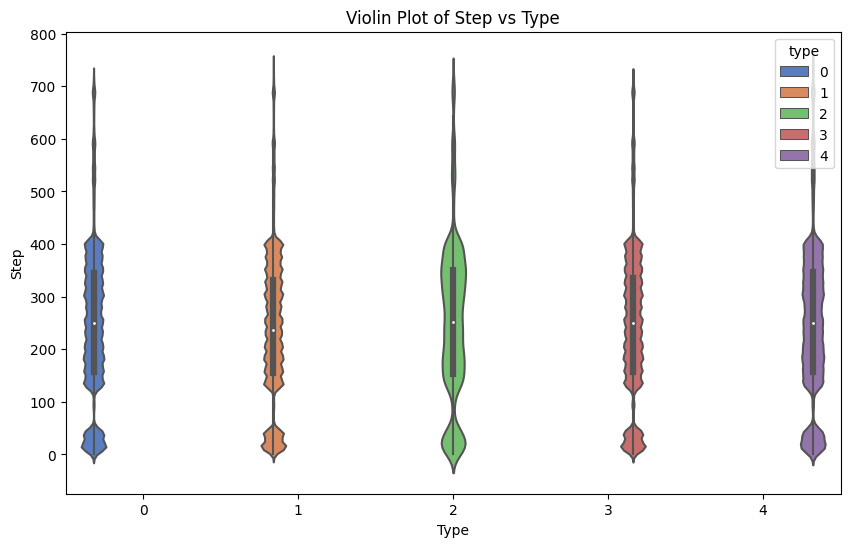

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1, x='type', y='step', hue='type', palette='muted')
plt.title('Violin Plot of Step vs Type')
plt.xlabel('Type')
plt.ylabel('Step')
plt.show()

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [171]:
from sklearn.utils import resample

df_0 = df1[df1.isFraud == 0]
df_1 = df1[df1.isFraud == 1]

df_minority_upsampled = resample(df_1, 
                                 replace=True,     
                                 n_samples=800000, 
                                 random_state=42)  

df_majority_downsampled = resample(df_0, 
                                   replace=False,    
                                   n_samples=2400000, 
                                   random_state=42)  

df = pd.concat([df_majority_downsampled, df_minority_upsampled])

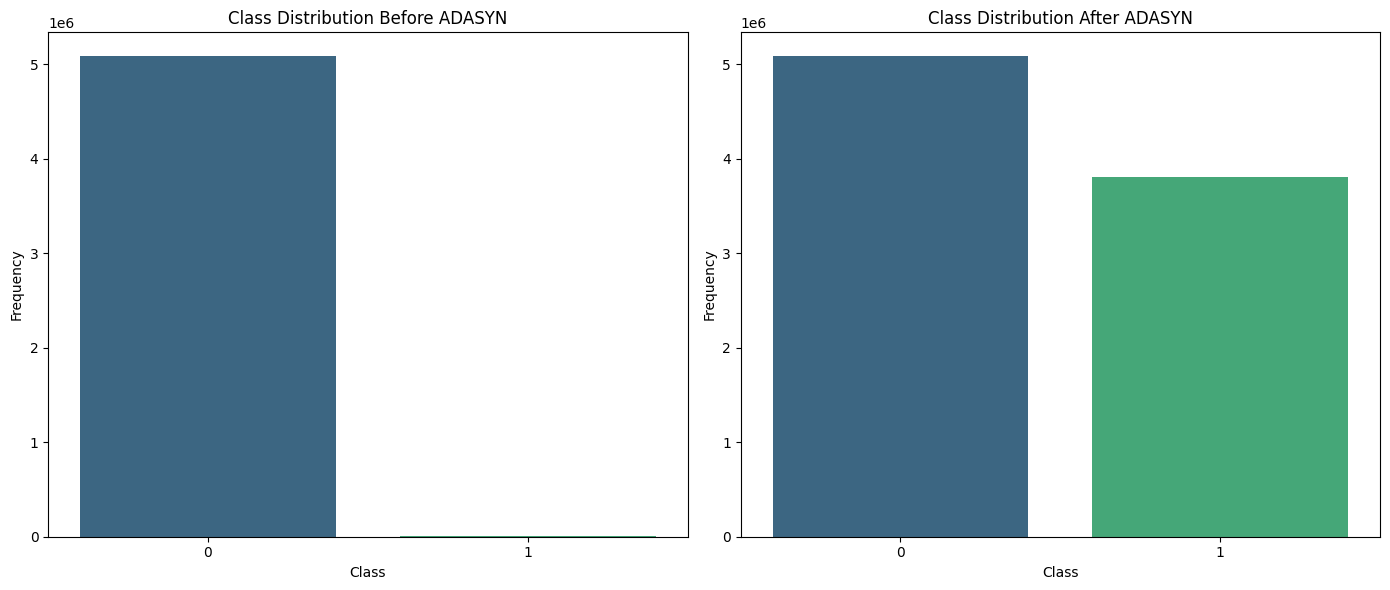

In [157]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=y_train, ax=axs[0], palette="viridis")
axs[0].set_title('Class Distribution Before ADASYN')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Frequency')

sns.countplot(x=y_train_resampled, ax=axs[1], palette="viridis")
axs[1].set_title('Class Distribution After ADASYN')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [175]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
X_train_scaled.shape

(2560000, 6)

In [177]:
X_test_scaled.shape

(640000, 6)

In [179]:
t = y_train.values
tt = y_test.values

type(t)

numpy.ndarray

In [180]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
y_train_cnn = t.reshape(-1,1,1)
y_test_cnn = tt.reshape(-1,1,1)

X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [181]:
t = X_train_cnn
t

array([[[ 0.87585657],
        [ 1.46233874],
        [-0.28179517],
        [-0.30423497],
        [-0.32973152],
        [-0.18149815]],

       [[-0.72807722],
        [ 1.46233874],
        [-0.23073817],
        [-0.28065366],
        [-0.32973152],
        [-0.12809334]],

       [[ 1.91233365],
        [-0.63597792],
        [ 0.74021798],
        [ 0.16779444],
        [ 0.10403822],
        [ 0.88751136]],

       ...,

       [[-0.49646223],
        [ 0.76289985],
        [-0.33712637],
        [-0.33466108],
        [-0.32973152],
        [-0.25040445]],

       [[-1.27237244],
        [ 1.46233874],
        [-0.23410567],
        [-0.28220899],
        [-0.32973152],
        [-0.13161569]],

       [[-0.79177134],
        [ 1.46233874],
        [ 0.0485767 ],
        [-0.33633962],
        [-0.15377858],
        [-0.25420585]]])

In [182]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2, strides=1),
    Conv1D(filters=32, kernel_size=3, activation='relu',padding='same'),
    MaxPooling1D(pool_size=2, strides=1),
    Conv1D(filters=16, kernel_size=3, activation='relu',padding='same'),
    MaxPooling1D(pool_size=2, strides=1),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])


cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [183]:
cnn_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_35 (Conv1D)              │ (None, 4, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_34 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_36 (Conv1D)              │ (None, 3, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_35 (MaxPooling1D) │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_37 (Conv1D)              │ (None, 2, 16)          │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_36 (MaxPooling1D) │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,785 (57.75 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
fraud = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=15, batch_size=256, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/15
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9598 - loss: 0.1010 - val_accuracy: 0.9864 - val_loss: 0.0371
Epoch 2/15
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9838 - loss: 0.0418 - val_accuracy: 0.9831 - val_loss: 0.0407
Epoch 3/15
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9864 - loss: 0.0356 - val_accuracy: 0.9888 - val_loss: 0.0304
Epoch 4/15
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9865 - loss: 0.0346 - val_accuracy: 0.9795 - val_loss: 0.0475
Epoch 5/15
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9873 - loss: 0.0328 - val_accuracy: 0.9817 - val_loss: 0.0420
Epoch 6/15
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9882 - loss: 0.0310 - val_accuracy: 0.9916 - val_loss: 0.0234
Epoch 7/15
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9893 - loss: 0.0282 - val_accuracy: 0.9909 - val_loss: 0.0238
Epoch 8/15
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9894 - loss: 0

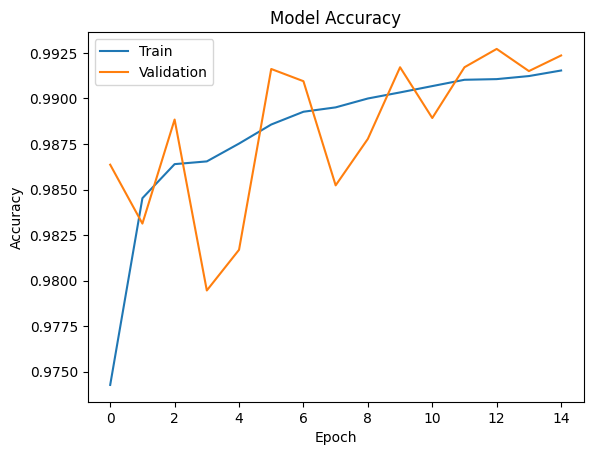

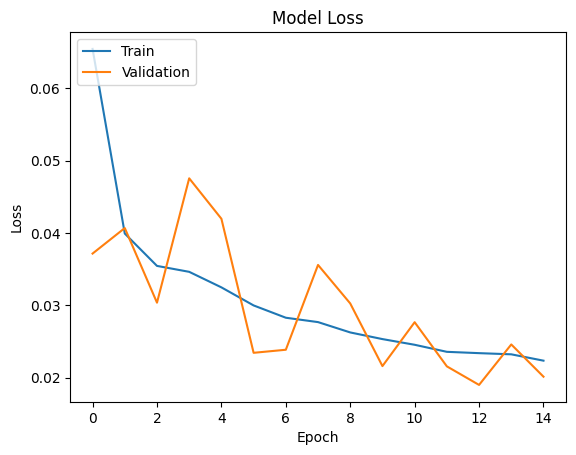

In [185]:
plt.plot(fraud.history['accuracy'])
plt.plot(fraud.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(fraud.history['loss'])
plt.plot(fraud.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [186]:
y_pred = cnn_model.predict(X_test_cnn)

20000/20000 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step


In [187]:
y_pred = y_pred.astype(int)
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [189]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  #for CNN

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[479767      1]
 [104537  55695]]
Accuracy: 0.8367
Precision: 1.0000
Recall: 0.3476
F1 Score: 0.5159
ROC-AUC Score: 0.6738


In [95]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

lstm_model = Sequential([
    LSTM(50, input_shape=(1, X_train_lstm.shape[2])),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

fraud2 = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 145s 4ms/step - accuracy: 0.9991 - loss: 0.0134 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 2/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 3/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9996 - val_loss: 0.0019
Epoch 4/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9993 - val_loss: 0.0023
Epoch 5/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 143s 5ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 6/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9996 - val_loss: 0.0017
Epoch 7/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 8/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - ac

In [96]:
lstm_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,005 (164.09 KB)

 Trainable params: 14,001 (54.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,004 (109.39 KB)

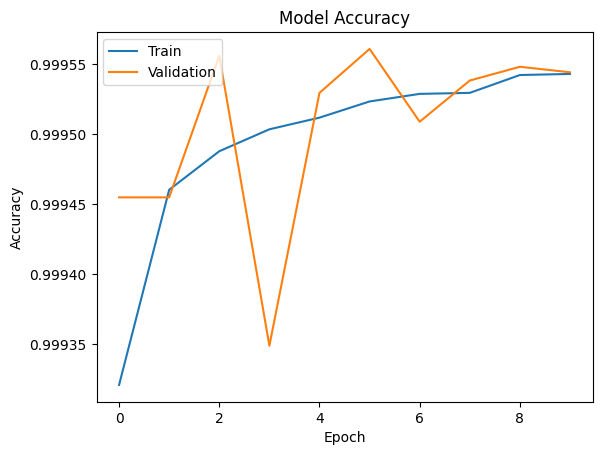

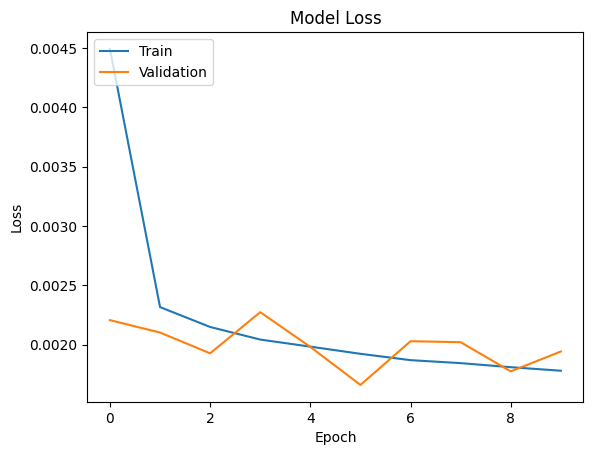

In [97]:
plt.plot(fraud2.history['accuracy'])
plt.plot(fraud2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(fraud2.history['loss'])
plt.plot(fraud2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [100]:
y_pred_lstm = lstm_model.predict(X_test_lstm)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step


In [101]:
y_pred_lstm = y_pred_lstm.astype(int)
y_pred_lstm

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  #for CNN

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[1270904       0]
 [   1163     457]]
Accuracy: 0.9991
Precision: 1.0000
Recall: 0.2821
F1 Score: 0.4401
ROC-AUC Score: 0.6410


In [104]:
cnn_features_train = cnn_model.predict(X_train_cnn)
cnn_features_test = cnn_model.predict(X_test_cnn)

lstm_features_train = lstm_model.predict(X_train_lstm)
lstm_features_test = lstm_model.predict(X_test_lstm)

159066/159066 ━━━━━━━━━━━━━━━━━━━━ 212s 1ms/step
39767/39767 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 218s 1ms/step
39767/39767 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step


In [105]:
X_combined_train = np.concatenate((cnn_features_train, lstm_features_train), axis=1)
X_combined_test = np.concatenate((cnn_features_test, lstm_features_test), axis=1)

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
fraud3 = rf_model.fit(X_combined_train, y_train)

In [108]:
y_pred_rf = rf_model.predict(X_combined_test)
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1270904\n           1       0.92      0.76      0.83      1620\n\n    accuracy                           1.00   1272524\n   macro avg       0.96      0.88      0.92   1272524\nweighted avg       1.00      1.00      1.00   1272524\n'

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {f1:.4f}")

roc_auc = roc_auc_score(y_test, y_pred_rf)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[1270795     109]
 [    385    1235]]
Accuracy: 0.9996
Precision: 0.9189
Recall: 0.7623
F1 Score: 0.8333
ROC-AUC Score: 0.8811


In [112]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [118]:
import torch
lstm_model.save('lstm_model.h5')

In [119]:
cnn_model.save('cnn_model.h5')

In [190]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cat_clf = CatBoostClassifier(silent=True)
cat_clf.fit(X_train_scaled, y_train)
y_pred = cat_clf.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9985421875

Confusion Matrix:
 [[478835    933]
 [     0 160232]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    479768
           1       0.99      1.00      1.00    160232

    accuracy                           1.00    640000
   macro avg       1.00      1.00      1.00    640000
weighted avg       1.00      1.00      1.00    640000



In [191]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9998390625

Confusion Matrix:
 [[479665    103]
 [     0 160232]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    479768
           1       1.00      1.00      1.00    160232

    accuracy                           1.00    640000
   macro avg       1.00      1.00      1.00    640000
weighted avg       1.00      1.00      1.00    640000



In [196]:
rf_probs = clf.predict_proba(X_test_scaled)[:, 1]
catboost_probs = cat_clf.predict_proba(X_test_scaled)[:, 1]

blend_ratio = 0.5
blended_probs = (blend_ratio * rf_probs) + ((1 - blend_ratio) * catboost_probs)

y_pred = np.where(blended_probs > 0.5, 1, 0)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9994265625
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    479768
           1       1.00      1.00      1.00    160232

    accuracy                           1.00    640000
   macro avg       1.00      1.00      1.00    640000
weighted avg       1.00      1.00      1.00    640000

Confusion Matrix:
 [[479401    367]
 [     0 160232]]


In [194]:
with open('/kaggle/input/voting/voting_clf_model.pkl', 'rb') as f:
    data = pickle.load(f)

In [195]:
data

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7aaacaaed510>)],
                 voting='soft')

In [200]:
y_pred = data.predict(X_test)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9995859375

Confusion Matrix:
 [[479503    265]
 [     0 160232]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    479768
           1       1.00      1.00      1.00    160232

    accuracy                           1.00    640000
   macro avg       1.00      1.00      1.00    640000
weighted avg       1.00      1.00      1.00    640000

